In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels import regression

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN

In [5]:
dbmeans_df = pd.read_csv('OHE_solved_map.csv')

In [6]:
dbmeans_df.head()

,Unnamed: 0,id,cntyfips,ori,state,agency,agentype,source,solved,year,...,weapon_map,homicide_map,situation_map,relationship_map,vicsex_map,vicrace_map,vicethnicp_map,offsex_map,offethnic_map,offrace_map
0,0,197701001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,...,0,0,0,0,0,0,0,0,0,0
1,1,197703001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,...,1,0,1,0,1,1,0,0,0,1
2,2,197703001AL00401,"Autauga, AL",AL00401,Alabama,Prattville,Municipal police,FBI,Yes,1977,...,2,0,0,1,1,0,0,1,0,0
3,3,197708001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,...,3,0,0,0,0,0,0,0,0,0
4,5,197805001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1978,...,3,0,1,1,1,0,0,1,0,0


In [10]:
dbmeans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525871 entries, 0 to 525870
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        525871 non-null  int64  
 1   id                525871 non-null  object 
 2   cntyfips          525871 non-null  object 
 3   ori               525871 non-null  object 
 4   state             525871 non-null  object 
 5   agency            525871 non-null  object 
 6   agentype          525871 non-null  object 
 7   source            525871 non-null  object 
 8   solved            525871 non-null  object 
 9   year              525871 non-null  int64  
 10  month             525871 non-null  object 
 11  incident          525871 non-null  int64  
 12  actiontype        525871 non-null  object 
 13  homicide          525871 non-null  object 
 14  situation         525871 non-null  object 
 15  vicage            525871 non-null  float64
 16  vicsex            52

In [12]:
from sklearn.preprocessing import StandardScaler

# Scaling data because distance is important here.

ss = StandardScaler()
X_scaled = ss.fit_transform(dbmeans_df.drop(columns = ['id', 'cntyfips', 'ori', 'state', 'agency', 'agentype', 'source',
       'solved', 'month', 'incident', 'actiontype', 'homicide',
       'situation', 'vicsex', 'vicrace', 'vicethnic', 'monthyear', 'datetime',
       'offsex', 'offrace', 'offethnic', 'weapon', 'relationship',
       'circumstance', 'msa',
       'datetime']))

In [13]:
X_scaled[:10]

array([[-1.72749659, -1.48150005,  1.9932416 ,  2.80196095, -0.22886894,
        -0.35714172, -1.48150005, -1.51865011, -1.61865605, -1.06840934,
        -0.14849716, -0.48325838, -0.94423764, -1.73402216, -0.94080819,
        -0.80562625, -0.3650073 , -0.79107176, -0.87311808],
       [-1.72749066, -1.48150005,  0.93926576,  1.91030484, -0.22886894,
         1.12130838, -1.48150005, -1.51865011, -1.0318228 , -0.68441898,
        -0.14849716,  0.95836928, -0.94423764,  0.57096071,  0.57892243,
        -0.80562625, -0.3650073 , -0.79107176,  0.62150261],
       [-1.72748474, -1.48150005, -0.3627044 , -0.76466347, -0.22886894,
        -0.35714172, -1.48150005, -1.51865011, -1.0318228 , -0.30042861,
        -0.14849716, -0.48325838, -0.79134446,  0.57096071, -0.94080819,
        -0.80562625,  2.73957083, -0.79107176, -0.87311808],
       [-1.72747881, -1.48150005, -0.98269018, -0.85382908, -0.22886894,
        -0.35714172, -1.48150005, -1.51865011,  0.43526034,  0.08356176,
        -0.148

In [14]:
dbscan = DBSCAN(eps = 0.5)

In [15]:
dbscan.fit(X_scaled)

DBSCAN()

In [16]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [17]:
set(dbscan.labels_)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [18]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, dbscan.labels_)

-0.5879111265908642

In [19]:
dbmeans_df['dbscan_cluster'] = dbscan.labels_

In [21]:
dbmeans_df.head()

,Unnamed: 0,id,cntyfips,ori,state,agency,agentype,source,solved,year,...,homicide_map,situation_map,relationship_map,vicsex_map,vicrace_map,vicethnicp_map,offsex_map,offethnic_map,offrace_map,dbscan_cluster
0,0,197701001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,...,0,0,0,0,0,0,0,0,0,-1
1,1,197703001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,...,0,1,0,1,1,0,0,0,1,-1
2,2,197703001AL00401,"Autauga, AL",AL00401,Alabama,Prattville,Municipal police,FBI,Yes,1977,...,0,0,1,1,0,0,1,0,0,-1
3,3,197708001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,...,0,0,0,0,0,0,0,0,0,-1
4,5,197805001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1978,...,0,1,1,1,0,0,1,0,0,-1


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

KeyboardInterrupt: 

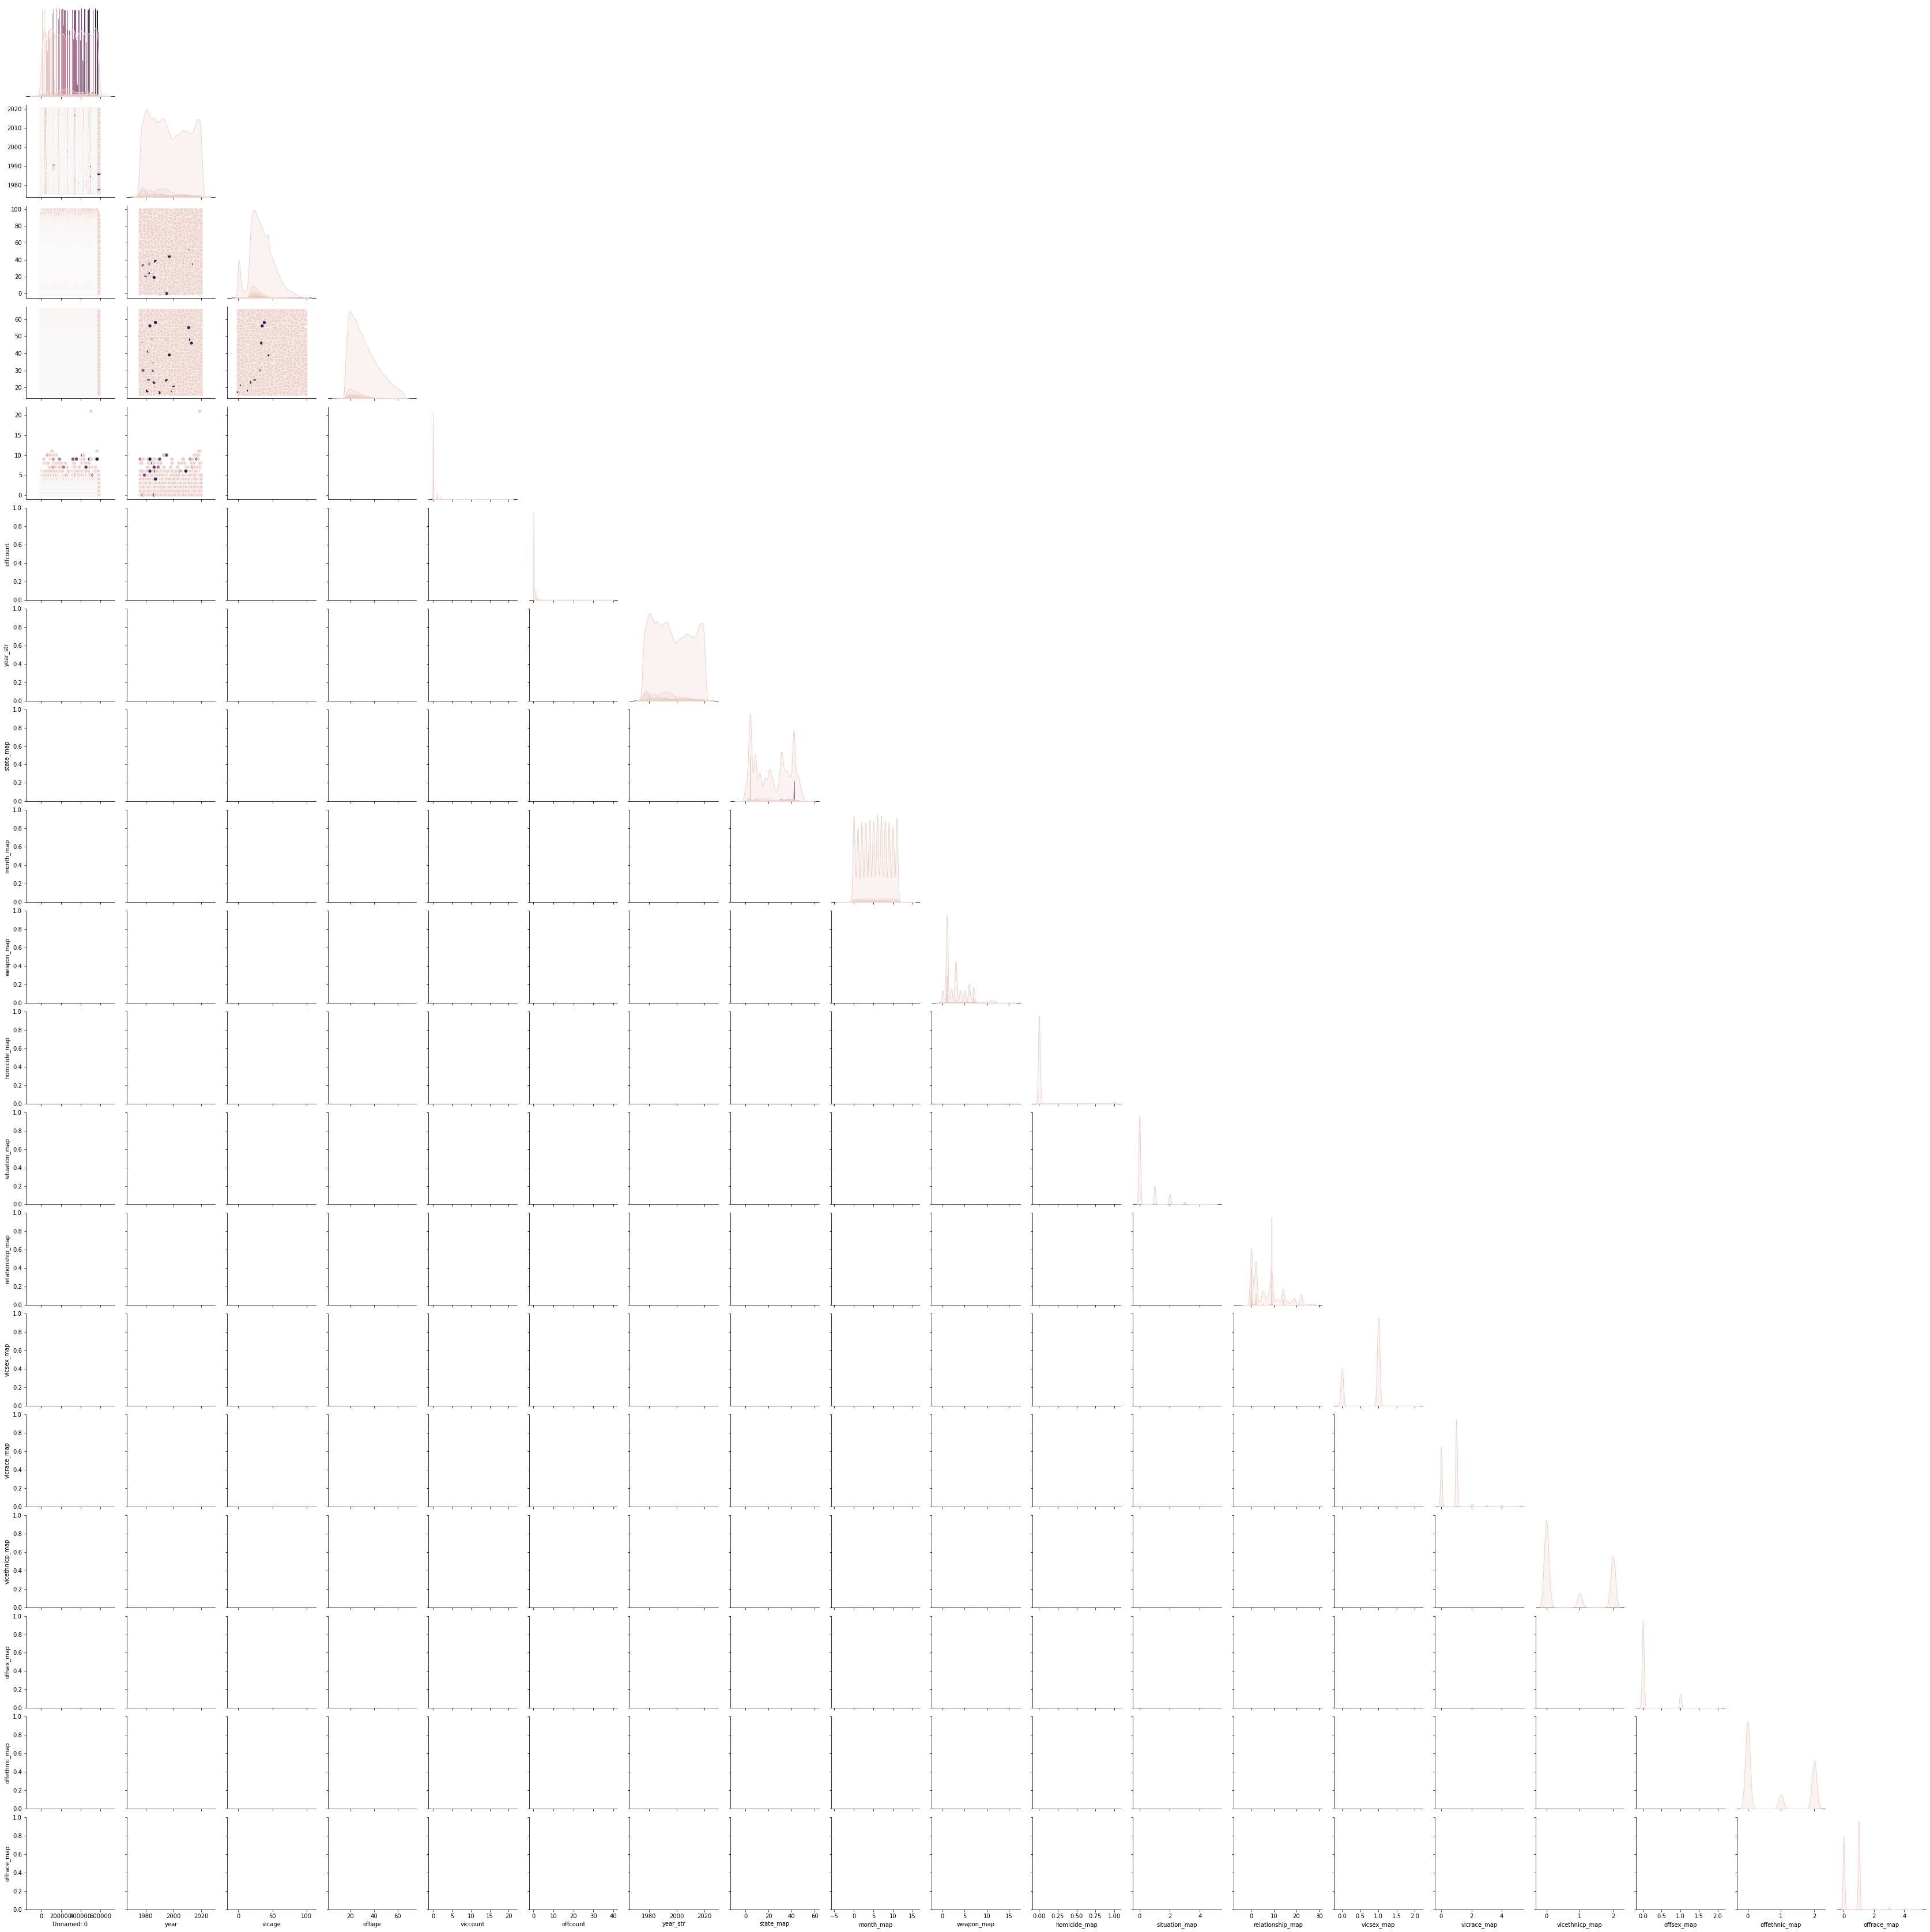

In [22]:
sns.pairplot(dbmeans_df.drop(columns = ['id', 'cntyfips', 'ori', 'state', 'agency', 'agentype', 'source',
       'solved', 'month', 'incident', 'actiontype', 'homicide',
       'situation', 'vicsex', 'vicrace', 'vicethnic', 'monthyear', 'datetime',
       'offsex', 'offrace', 'offethnic', 'weapon', 'relationship',
       'circumstance', 'msa',
       'datetime']),
            hue = 'dbscan_cluster',
            corner = True)